# Step 1: Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

import tensorflow_datasets as tfds
from keras import layers
from keras.layers import Dense, Dropout
from keras.models import Sequential

import warnings
warnings.filterwarnings('ignore')

# Step 2: Loading data

In [ ]:
 # tfds.list_builders()

In [ ]:
(train_data, val_data, test_data), matadata = tfds.load(
    'tf_flowers',
    split=('train[:80%]', 'train[80%:90%]', 'train[90%:]'),
    with_info=True,
    as_supervised=True,
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
type(train_data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [ ]:
train_data.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

# View the data

tf.Tensor(2, shape=(), dtype=int64)


Text(0.5, 1.0, 'tulips')

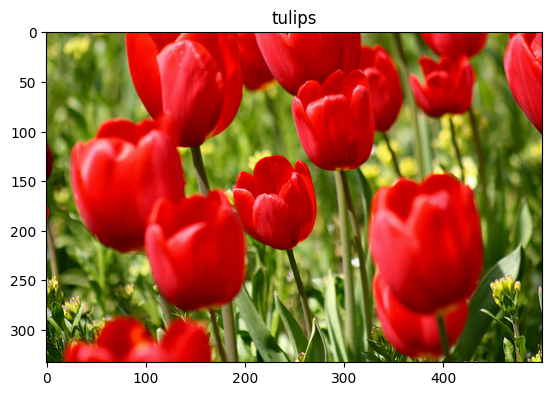

In [ ]:
image, label = next(iter(train_data.take(5)))
plt.imshow(image)
label_name = matadata.features['label'].int2str(label)
# plt.title(str(label.numpy()))
print(label)
plt.title(label_name)

tf.Tensor(2, shape=(), dtype=int64)


Text(0.5, 1.0, 'tulips')

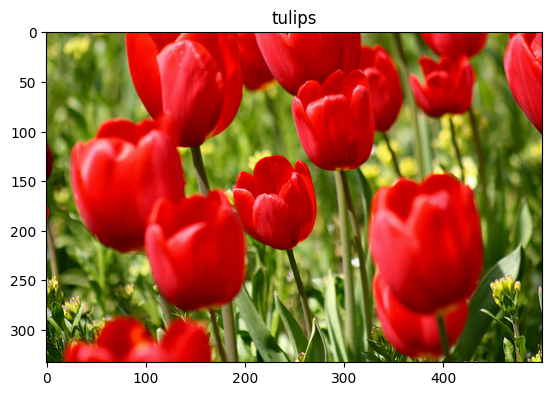

In [ ]:
image, label = next(iter(train_data))
plt.imshow(image)
label_name = matadata.features['label'].int2str(label)
# plt.title(str(label.numpy()))
print(label)
plt.title(label_name)

Text(0.5, 1.0, 'tulips')

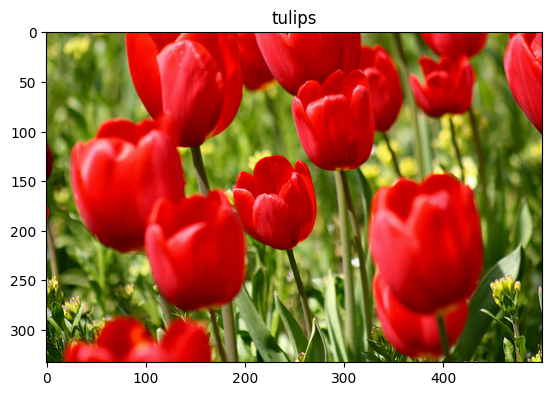

In [ ]:
image, label = next(iter(train_data.take(1)))
plt.imshow(image)
label_name = matadata.features['label'].int2str(label)
# plt.title(str(label.numpy()))
plt.title(label_name)

(333, 500, 3)
tf.Tensor(2, shape=(), dtype=int64)
(212, 320, 3)
tf.Tensor(3, shape=(), dtype=int64)
(240, 320, 3)
tf.Tensor(3, shape=(), dtype=int64)


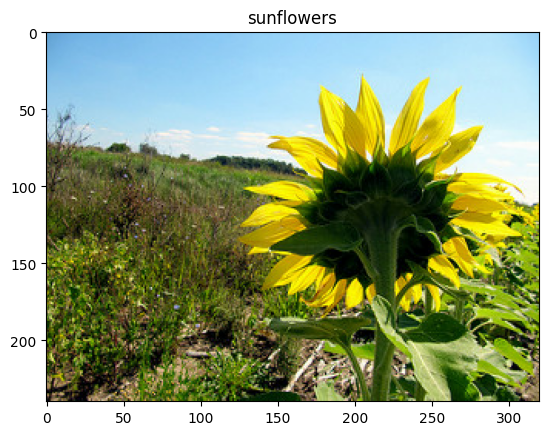

In [ ]:
for image, label in iter(train_data.take(3)):
  print(image.shape)
  print(label)
  plt.imshow(image)
  label_name = matadata.features['label']. int2str(label)
  plt.title(label_name)
  plt.imshow(image)

In [ ]:
print(type(image), image)
print(type(label), label)

<class 'tensorflow.python.framework.ops.EagerTensor'> tf.Tensor(
[[[ 96 160 208]
  [ 95 159 207]
  [ 96 160 208]
  ...
  [155 211 246]
  [154 210 245]
  [151 209 246]]

 [[ 97 161 209]
  [ 96 160 208]
  [ 97 161 209]
  ...
  [155 211 246]
  [154 210 245]
  [151 209 246]]

 [[ 98 162 210]
  [ 97 161 209]
  [ 98 162 210]
  ...
  [155 211 246]
  [154 210 245]
  [151 209 246]]

 ...

 [[ 43  29  28]
  [ 70  52  50]
  [  3   0   0]
  ...
  [102  88  41]
  [142 125  82]
  [142 119  87]]

 [[ 32  43  29]
  [ 31  21  20]
  [ 26  20   6]
  ...
  [113 100  56]
  [131 114  68]
  [147 124  90]]

 [[  0  13  16]
  [  6   0  16]
  [ 30  20  10]
  ...
  [139 125  88]
  [135 119  70]
  [138 117  74]]], shape=(240, 320, 3), dtype=uint8)
<class 'tensorflow.python.framework.ops.EagerTensor'> tf.Tensor(3, shape=(), dtype=int64)


In [ ]:
images = []
labels = []
for image, label in iter(train_data.take(3)):
    print(image.shape)
    print(label)
    label_name = matadata.features['label'].int2str(label)
    print(label_name)
    images.append(image)
    labels.append(label_name)


(333, 500, 3)
tf.Tensor(2, shape=(), dtype=int64)
tulips
(212, 320, 3)
tf.Tensor(3, shape=(), dtype=int64)
sunflowers
(240, 320, 3)
tf.Tensor(3, shape=(), dtype=int64)
sunflowers


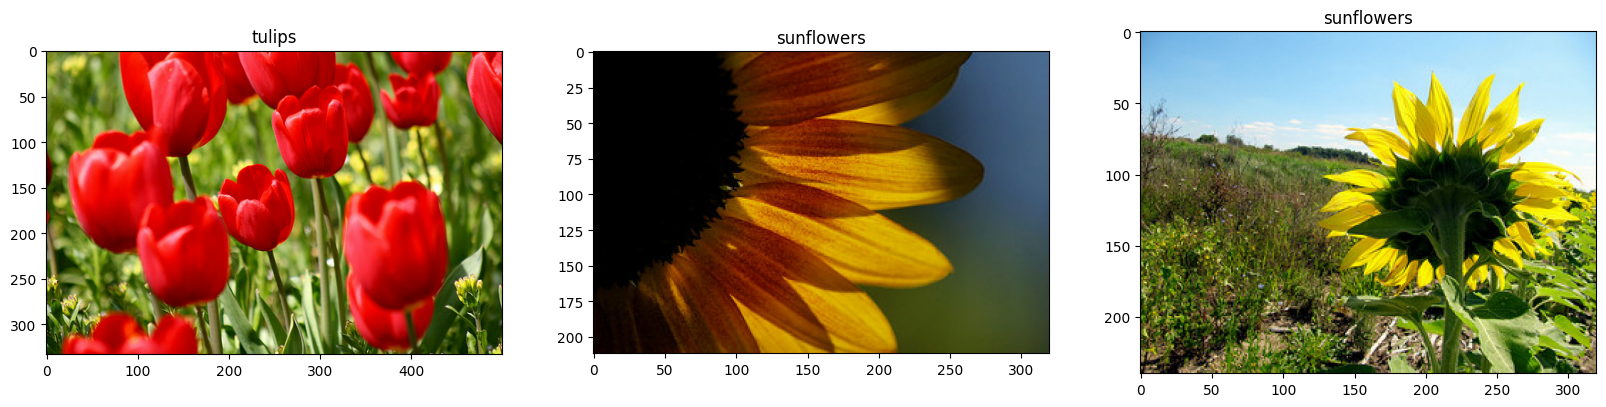

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 20))
for i in range(3):
  ax[i].imshow(images[i])
  ax[i].set_title(labels[i])
plt.show()

# Step 3: Basic Preprocessing

In [ ]:
#(333,500,3) - Height:333, Width:500, 3-> Color Image
IMG_SIZE  = 180
resize_rescale = tf.keras.Sequential([
    layers.Resizing(IMG_SIZE,IMG_SIZE),# Resize - 180,180,3
    layers.Rescaling(1./255)  # Normalization -->0-255 --> 0-1
])

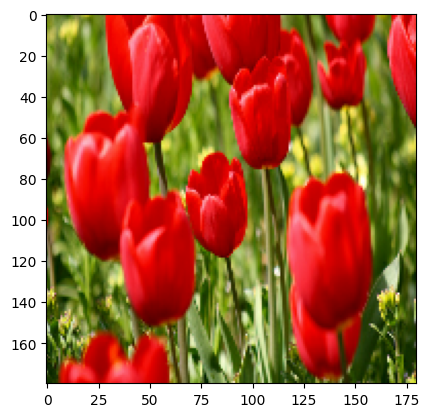

In [ ]:
result = resize_rescale(images[0])
plt.imshow(result)

# Step 4: Data Augmentaion

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

In [ ]:
images[0]

<tf.Tensor: shape=(333, 500, 3), dtype=uint8, numpy=
array([[[ 93, 122,  30],
        [ 90, 118,  31],
        [ 88, 118,  28],
        ...,
        [247,  77,  78],
        [253,  87,  87],
        [255,  76,  75]],

       [[ 98, 125,  30],
        [ 95, 124,  32],
        [ 96, 125,  32],
        ...,
        [247,  81,  83],
        [250,  86,  84],
        [252,  71,  64]],

       [[ 98, 126,  26],
        [101, 128,  31],
        [106, 132,  33],
        ...,
        [254,  81,  85],
        [254,  79,  76],
        [252,  55,  47]],

       ...,

       [[ 35,  51,   6],
        [ 21,  49,   0],
        [ 30,  57,   6],
        ...,
        [224, 239,  78],
        [192, 208,  50],
        [ 88,  54,  53]],

       [[ 65,  73,  32],
        [ 20,  46,   0],
        [ 22,  48,   0],
        ...,
        [230, 236,  74],
        [230, 246,  62],
        [ 88,  57,  36]],

       [[ 95,  97,  60],
        [ 15,  41,   0],
        [ 23,  51,   3],
        ...,
        [210, 224,  4

In [ ]:
processing = tf.keras.Sequential([
    resize_rescale,
    data_augmentation
])
processing

<Sequential name=sequential_2, built=True>

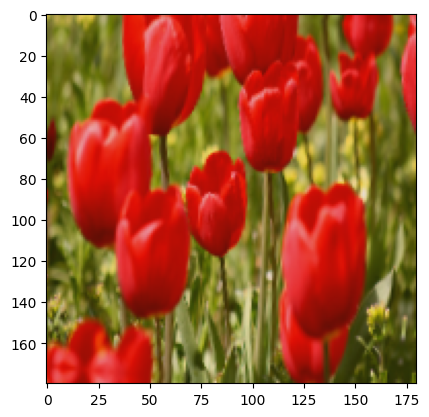

In [ ]:
r = processing(images[0])
plt.imshow(r)

# Build the model

In [ ]:
num_classes = 5
model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(IMG_SIZE, IMG_SIZE, 3)), #
  tf.keras.layers.Conv2D(32, 3, activation='relu',input_shape=(IMG_SIZE, IMG_SIZE,3)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
 ])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,658,565 (6.33 MB)

 Trainable params: 1,658,565 (6.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
 num_classes = 5
# Applying Processing - of Image
# Apply resize_rescale and data_augmentation to your training data before feeding it to the model
 def preprocess(image, label):
  image = resize_rescale(image)
  image = data_augmentation(image)
  return image, label

  # Apply preprocessing to your datasets
 train_data = train_data.map(preprocess).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
 val_data = val_data.map(preprocess).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
 test_data = test_data.map(preprocess).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# Converting into batch
BATCH_SIZE = 32  # You can adjust this value based on your system resources
train_data = train_data.batch(BATCH_SIZE)
val_data = val_data.batch(BATCH_SIZE)
test_data = test_data.batch(BATCH_SIZE)

In [ ]:
# compile the model
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
# train the model
model.fit(
  train_data,
  validation_data=val_data,
  epochs=3
 )

Epoch 1/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.3222 - loss: 1.5284 - val_accuracy: 0.5123 - val_loss: 1.2390
Epoch 2/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.5311 - loss: 1.1550 - val_accuracy: 0.5368 - val_loss: 1.1261
Epoch 3/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.5899 - loss: 1.0350 - val_accuracy: 0.5777 - val_loss: 1.0375


In [ ]:
# evaluate the set
acc,loss=model.evaluate(test_data)
acc,loss

# Without Data Augmentation

In [ ]:
# Load data again
(train_data, val_data, test_data), matadata = tfds.load(
'tf_flowers',
split=('train[:80%]', 'train[80%:90%]', 'train[90%:]'),
with_info=True,
as_supervised=True,
)

def preprocess_no_da(image, label):
 image = resize_rescale(image)
 return image, label

# Apply preprocessing to your datasets
train_data = train_data.map(preprocess).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_data = val_data.map(preprocess).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.map(preprocess).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Converting into batch   ( create again)
BATCH_SIZE = 32  # You can adjust this value based on your system res
train_data = train_data.batch(BATCH_SIZE)
val_data = val_data.batch(BATCH_SIZE)
test_data = test_data.batch(BATCH_SIZE)

In [ ]:
 num_classes = 5
 model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(IMG_SIZE, IMG_SIZE, 3)), #
  tf.keras.layers.Conv2D(32, 3, activation='relu',input_shape=(IMG_SIZE, IMG_SIZE,3)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
 ])
 model.summary()

In [ ]:
# compile the model
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
# train the model test
model.fit(
  train_data,
  validation_data=val_data,
  epochs=3
 )

Epoch 1/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.3351 - loss: 1.4650 - val_accuracy: 0.5613 - val_loss: 1.1464
Epoch 2/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.5625 - loss: 1.1003 - val_accuracy: 0.6240 - val_loss: 0.9910
Epoch 3/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.6333 - loss: 0.9580 - val_accuracy: 0.6621 - val_loss: 0.9241


In [ ]:
# evaluate the  set
acc,loss=model.evaluate(test_data)
acc,loss

12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 530ms/step - accuracy: 0.5982 - loss: 0.9757


(0.9409347772598267, 0.6103542447090149)

# Reading Data From Folder - Train / Validation / Testing folder

In [ ]:
import pathlib   # loading image directly from the url use this approach
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
!ls /root/.keras/datasets/flower_photos

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


In [ ]:
# here we create folders like this
'''
 flowers_photos/
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/
 '''

In [ ]:
img_height=180   # training
img_width=180
batch_size=32
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,           # validation
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 5
model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(IMG_SIZE, IMG_SIZE, 3)), # Add an InputLayer to specify the input shape
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.RandomFlip('horizontal_and_vertical'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomContrast(0.2),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
 ])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip_1 (RandomFlip)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_1 (RandomRotation)   │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_1 (RandomZoom)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_contrast_1 (RandomContrast)   │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 87, 87, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 43, 43, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 41, 41, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 20, 20, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,658,565 (6.33 MB)

 Trainable params: 1,658,565 (6.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile the model
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
# train the model test
model.fit(
  train_data,
  validation_data=val_data,
  epochs=3
 )

Epoch 1/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.2302 - loss: 1.6038 - val_accuracy: 0.2425 - val_loss: 1.6028
Epoch 2/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.2491 - loss: 1.6031 - val_accuracy: 0.2425 - val_loss: 1.5966
Epoch 3/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.2491 - loss: 1.6014 - val_accuracy: 0.2425 - val_loss: 1.5941


In [ ]:
# evaluate the  set
acc,loss=model.evaluate(test_data)
acc,loss

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 378ms/step - accuracy: 0.2058 - loss: 1.6126


(1.6130080223083496, 0.19073569774627686)

Assignment-- cifar10 -- cifar100 -- cars196